# RFC: Human Resources Analytics: Why are our best and most experienced employees leaving prematurely?

In [32]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import statistics

In [2]:
hr_stats = pd.read_csv('/Users/cappsjr/Downloads/HR_comma_sep.csv')

# The Dataset

Before diving into the meat of this RFC, it is important that the data set that it is based on be examined. The data set was published on Kaggle by Ludovic Benistant under a CC-BY-SA-4.0 license. The dataset is a simulated dataset. Employee information found in the data includes satisfaction level, last evaluation performance, number of projects completed, average monthly hours, amount of time spent at the company, any work accidents, whether the employee left or remains with the company, whether the employee had been promoted in the last five years, department, and salary level (low, medium, or high).  Below you will find visuals that show the number of employees for each categorical variable, including, the amount of time spent (in years) at the company, the number of projects completed, whether or not the employee has experienced a work accident, whether or not the employee has left the company, whether or not the employee has been promoted in the last five years, deparment of the company, and salary level. 

Weakness in the Data:



In [3]:
#information about the data
hr_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


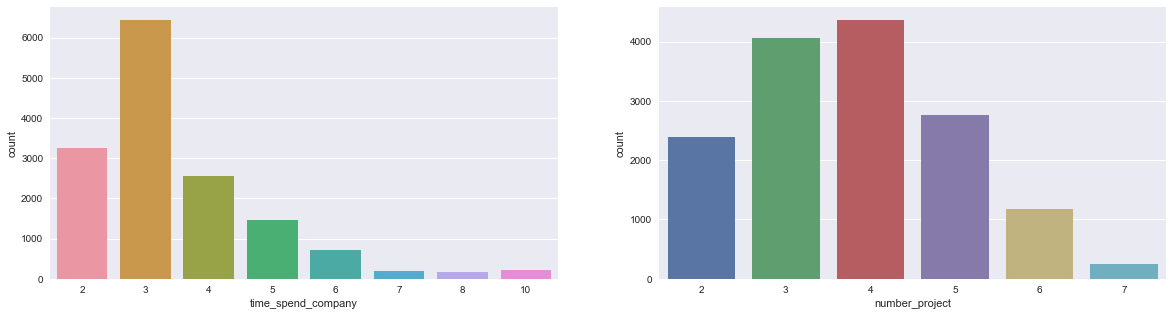

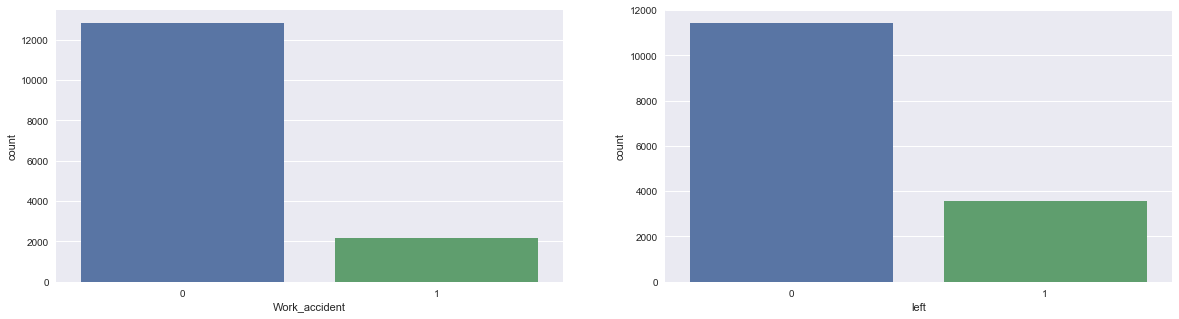

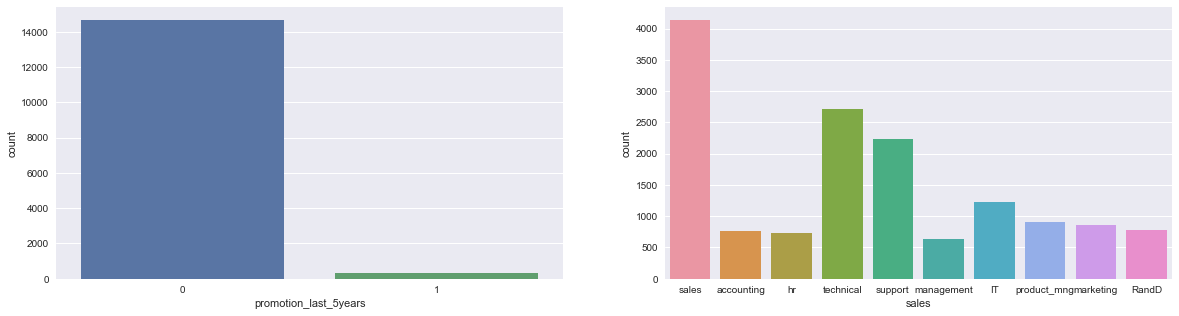

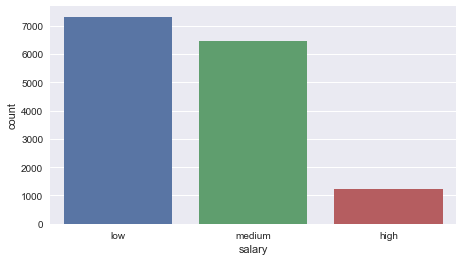

In [4]:
#Employee counts and visualizations for the categorical variables included in the dataset
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.countplot(x='time_spend_company',data = hr_stats)
plt.subplot(1, 2, 2)
sns.countplot(x='number_project',data = hr_stats)
plt.show()

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.countplot(x='Work_accident',data = hr_stats)
plt.subplot(1, 2, 2)
sns.countplot(x='left',data = hr_stats)
plt.show()

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.countplot(x='promotion_last_5years',data = hr_stats)
plt.subplot(1, 2, 2)
sns.countplot(x='sales',data = hr_stats)
plt.show()

plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
sns.countplot(x='salary',data = hr_stats)
plt.show()

# The Problem:  Employee Churn

The problem that will be addressed with this experiment is employee churn.  Employee churn is the overall turnover in a company’s staff during a given period of time as old employees leave and new employees are hired.  There will be inevitable employee turnover, but a high churn rate is costly to a company because recruitment, hiring, and training all comes with a price, and it will also take time for a new employee to be as productive as an existing employee.  Furthermore, an unusually high employee churn rate may indicate other problems that exist within the organization, such as unreasonable expectations, uncompetitive compensation, low morale, poor management, or ineffective human resources management.  The data examined shows an employment churn rate of 23.8%, nearly a quarter of the employees represented in the dataset.  The employee churn rate is usually measured by calculating the percentage of employees who leave the company during a given period of time.  However, the information in the dataset does not define any period of time, so in this case there there is an assumption that the dataset represents a given period of time, and the churn rate will be measured by calculating the percentage of employees who have left within that time period.

Before attempting to develop a solution to the problem of employee churn, it is helpful to examine and compare the characteristics of the employees who left the company and the employees who stayed with the company.  When one looks at the average employee who left compared to the average employee who did not stay (using the mean) several important data points pop out, the most relevant for our purpose being that the employee has a much lower satisfaction level (0.44 compared to 0.67) and a much lower rate of promotion in the last five years (0.005 compare to 0.026).  However, there is more than that to the story because the averages do not address salary level.  %60.82 of employees who left had a low salary compared to %45.12 of employees who stayed, %36.88 of employees who left had a medium salary compared to %44.88 of employees who stayed, and %2.30 of employees who left had a high salary compared to %10.11 of employees who stayed.        

In [5]:
#the total number of employees who left and the proportion of employees who left
num_left = len(hr_stats[hr_stats['left']==1])
num_total = len(hr_stats)
print("Number of Employees That Left:", num_left)
print("Total Number of Employees in the Dataset:", num_total)
print("Proportion of Employees Who Left:", '%',(num_left/num_total) * 100,)

Number of Employees That Left: 3571
Total Number of Employees in the Dataset: 14999
Proportion of Employees Who Left: % 23.80825388359224


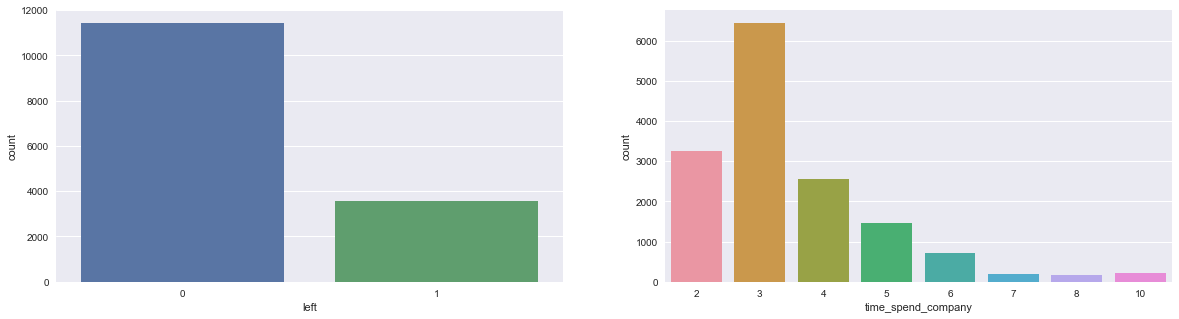

In [25]:
#Visual comparing the number of employees who have left to the number who have not left
#Visual showing the number of employees who have stayed with the company a set amount of time
#(2 years, 3 year,...10 years)
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='left',data = hr_stats)
plt.subplot(1, 2, 2)
sns.countplot(x='time_spend_company', data=hr_stats)
plt.show()

In [92]:
#Need to examine why employees left and the characteristics of the employees who left and the employees who 
#did not leave.

#Mean satisfaction level for those employees who left the company
sat_level_left = hr_stats[(hr_stats['left']==1) & (hr_stats['satisfaction_level'])]
print('Averages (Mean): Left the Company')
print(sat_level_left.mean())

#Mean satisfaction level for those employees who did not leave the company
sat_level_stay = hr_stats[(hr_stats['left']==0) & (hr_stats['satisfaction_level'])]
print('Averages (Mean): Did NOT Leave the Company')
print(sat_level_stay.mean())

Averages (Mean): Left the Company
satisfaction_level         0.440098
last_evaluation            0.718113
number_project             3.855503
average_montly_hours     207.419210
time_spend_company         3.876505
Work_accident              0.047326
left                       1.000000
promotion_last_5years      0.005321
dtype: float64
Averages (Mean): Did NOT Leave the Company
satisfaction_level         0.666810
last_evaluation            0.715473
number_project             3.786664
average_montly_hours     199.060203
time_spend_company         3.380032
Work_accident              0.175009
left                       0.000000
promotion_last_5years      0.026251
dtype: float64


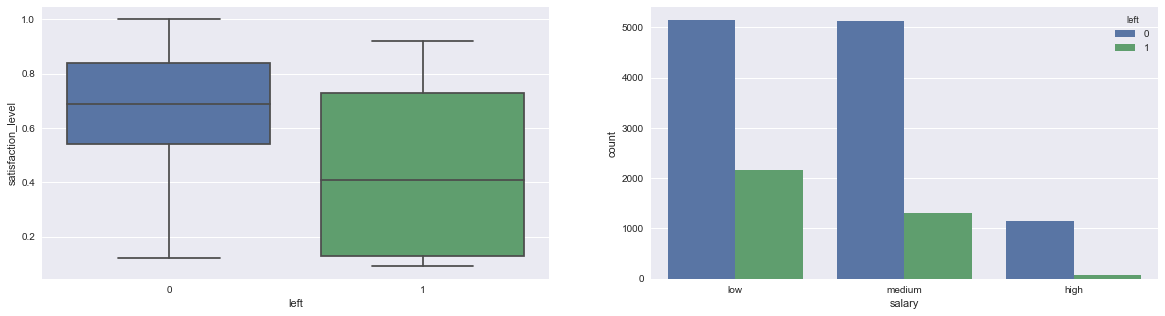

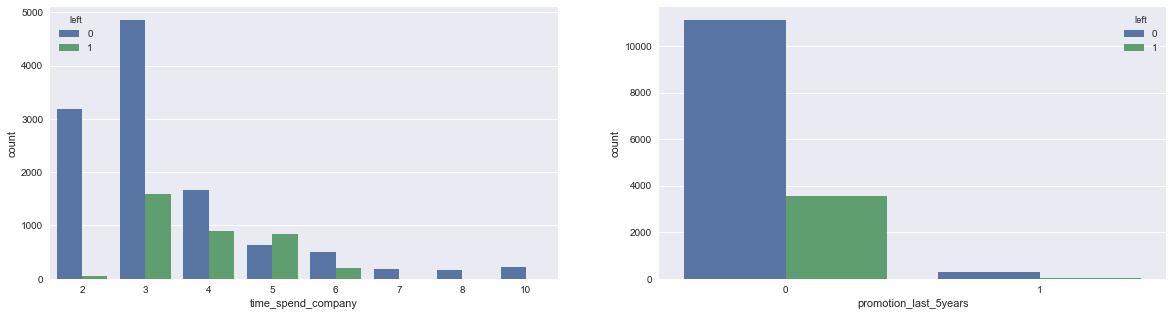

In [81]:
#Looking at the relationship between satisfation level, salary, and whether or not the employee left
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.boxplot(x='left', y='satisfaction_level', data=hr_stats)
plt.subplot(1, 2, 2)
sns.countplot(x='salary',data = hr_stats, hue='left')
plt.show()

#Looking at the relationship between the amount of time spent at the company, whether or not the employee
#received a promotion in the last five years, and whether or not the employee left
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.countplot(x='time_spend_company',data = hr_stats, hue='left')
plt.subplot(1, 2, 2)
sns.countplot(x='promotion_last_5years',data = hr_stats, hue='left')
plt.show()

In [106]:
#Number of employees who left at each salary level
print('# of Employees Who Left with Low Salary:', len(hr_stats[(hr_stats['left']==1) & (hr_stats['salary']=='low')]), 
      '     Proportion: %', 2172/3571*100)
print('# of Employees Who Left with Medium Salary:', len(hr_stats[(hr_stats['left']==1) & (hr_stats['salary']=='medium')]), 
      '  Proportion: %', 1317/3571*100)
print('# of Employees Who Left with High Salary:', len(hr_stats[(hr_stats['left']==1) & (hr_stats['salary']=='high')]), 
      '      Proportion: %', 82/3571*100)

# of Employees Who Left with Low Salary: 2172      Proportion: % 60.82329879585551
# of Employees Who Left with Medium Salary: 1317   Proportion: % 36.88042565107813
# of Employees Who Left with High Salary: 82       Proportion: % 2.2962755530663683


In [112]:
#Number of employees who stayed at each salary level
print('# of Employees Who Stayed with Low Salary:', len(hr_stats[(hr_stats['left']==0) & (hr_stats['salary']=='low')]), 
      '     Proportion: %', 5144/11428*100)
print('# of Employees Who Stayed with Medium Salary:', len(hr_stats[(hr_stats['left']==0) & (hr_stats['salary']=='medium')]), 
      '  Proportion: %', 5129/11428*100)
print('# of Employees Who Stayed with High Salary:', len(hr_stats[(hr_stats['left']==0) & (hr_stats['salary']=='high')]), 
      '    Proportion: %', 1155/11428*100)

# of Employees Who Stayed with Low Salary: 5144      Proportion: % 45.01225061253062
# of Employees Who Stayed with Medium Salary: 5129   Proportion: % 44.88099404970248
# of Employees Who Stayed with High Salary: 1155     Proportion: % 10.106755337766888


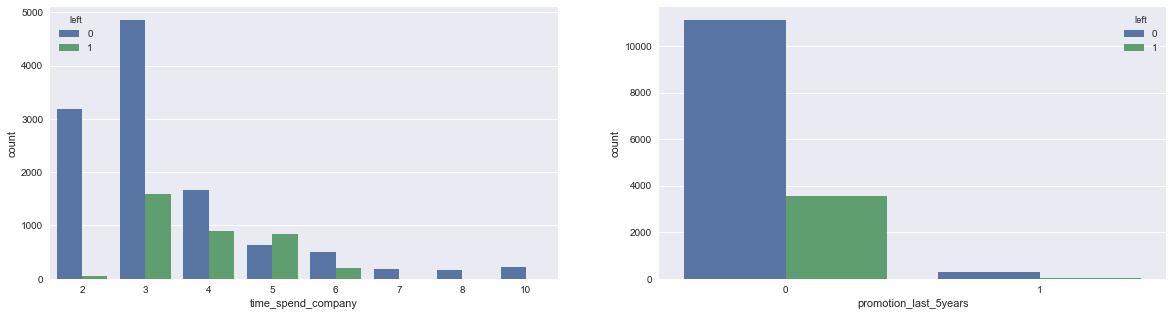

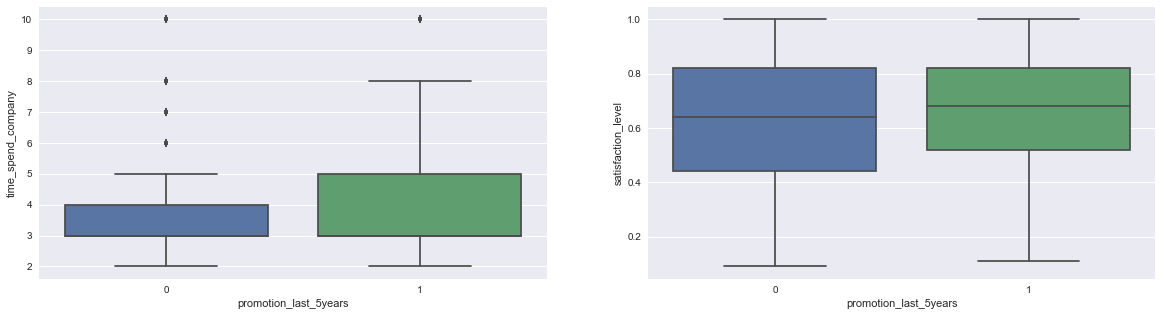

In [80]:
#Examining the categorical variables years spent at the company and promotions within the last 5 years 
#and comparing the number of employees who left and did not leave for both variables
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.countplot(x='time_spend_company',data = hr_stats, hue='left')
plt.subplot(1, 2, 2)
sns.countplot(x='promotion_last_5years',data = hr_stats, hue='left')
plt.show()

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.boxplot(x='promotion_last_5years', y='time_spend_company', data=hr_stats)
plt.subplot(1, 2, 2)
sns.boxplot(x='promotion_last_5years', y='satisfaction_level', data=hr_stats)
plt.show()

# The Potential Solution:  Promotion of Employees

When examining the differences between the employees that left the company and the employees that did not leave the company, there is one observation that is very relevant to developing a solution to employee turnover: the satisfaction level of those who leave is significantly lower than those who do not leave the company.  This might seem logical, but the key to developing a solution to the problem is understanding why those employees who leave are less satisfied.  In this regard there seem to be two potential answers: 1) they are not satisfied because of their salary level; or 2) they are not satisfied because they have not received a promotion in the last five years.      

Hypothesis:  More frequent promotion of employees is more likely to reduce employee turnover by showing a level of trust, loyalty, and commitment than the current promotion and raise policy.

Promoting employees before a five-year period has passed will decrease employee churn by showing a level of loyalty and commitment from the company to the employee.  This hypothesis was developed because of the following data presented below on employee promotion and the amount of time employees stayed with the company.  A total of 3,571 employees from the dataset left the company, and of that number, 3,552 (or %99.47 of the employees who left) had not been promoted in the last five years.  That means that only 19 (or %0.53 of the employees who left) employees who were promoted in the last five years chose to leave the company. The data also shows that the number of employees who stay with the company for four years, five years, on up to ten years is much smaller than the number of employees who stay for three years or two years (see the graph above).  Along the same vein, the data shows that the number of employees who leave the company after three years is much greater than after four years or five years.  1,586 employees left the company after three years compared to 890 and 833 employees leaving after four years and five years, respectively.  Only 290 employees left after 6 years, and not a single employee left after eight year, nine years, or ten years.  This indicates that the longer you can keep the employee the more likely the employee is to stay.  And finally, the data shows that employees who are promoted tend to stay longer than employees who are not promoted.  Therefore, I believe that promoting employees will encourage them to stay with the company longer and decrease employee churn.    

In [121]:
#Mean satisfaction level for employees promoted in the last five years
prom_sat_level = hr_stats[(hr_stats['promotion_last_5years']==1) & (hr_stats['satisfaction_level'])]
print('Averages (Mean): Promoted in the Last 5 Years')
print(prom_sat_level.mean())

#Mean satisfaction level for employees not promoted in the last five years
nonprom_sat_level = hr_stats[(hr_stats['promotion_last_5years']==0) & (hr_stats['satisfaction_level'])]
print('Averages (Mean): NOT Promoted in the Last 5 Years')
print(nonprom_sat_level.mean())

Averages (Mean): Promoted in the Last 5 Years
satisfaction_level         0.656019
last_evaluation            0.706019
number_project             3.752351
average_montly_hours     199.849530
time_spend_company         4.166144
Work_accident              0.238245
left                       0.059561
promotion_last_5years      1.000000
dtype: float64
Averages (Mean): NOT Promoted in the Last 5 Years
satisfaction_level         0.611895
last_evaluation            0.716321
number_project             3.804155
average_montly_hours     201.076431
time_spend_company         3.483719
Work_accident              0.142575
left                       0.241962
promotion_last_5years      0.000000
dtype: float64


In [7]:
#the number of employees promoted and not promoted in the last 5 years
num_unpromoted = len(hr_stats[hr_stats['promotion_last_5years']==0])
num_promoted = len(hr_stats[hr_stats['promotion_last_5years']==1])
print("Number Promoted:", num_promoted)
print("Number Not Promoted:", num_unpromoted)

Number Promoted: 319
Number Not Promoted: 14680


In [8]:
#the  proportion and number of employees who weren't promoted and left and who were promoted and left
promoted_left = len(hr_stats[(hr_stats['promotion_last_5years']==1) & (hr_stats['left']==1)])
unpromoted_left = len(hr_stats[(hr_stats['promotion_last_5years']==0) & (hr_stats['left']==1)])
print("Number of Employees Who Weren't Promoted and Left:", unpromoted_left)
print("Proportion of Employees Who Left That Were Not Promoted in the Last 5 Years:", '%', (unpromoted_left/num_left)*100)
print("Number of Employees Who Were Promoted and Left:", promoted_left)
print("Proportion of Employees Who Left That Were Promoted in the Last 5 Years:", '%', (promoted_left/num_left)*100)
print("Number of Employees Who Left:", num_left)

Number of Employees Who Weren't Promoted and Left: 3552
Proportion of Employees Who Left That Were Not Promoted in the Last 5 Years: % 99.46793615233828
Number of Employees Who Were Promoted and Left: 19
Proportion of Employees Who Left That Were Promoted in the Last 5 Years: % 0.5320638476617194
Number of Employees Who Left: 3571


In [123]:
#Examining the relationship between salary level and satisfaction level

#Mean satisfaction level for employees with a low salary level
low_sat_level = hr_stats[(hr_stats['salary']=='low') & (hr_stats['satisfaction_level'])]
print('Averages (Mean): Employees with Low Salary Level')
print(low_sat_level.mean())

#Mean satisfaction level for employees with a medium salary level
med_sat_level = hr_stats[(hr_stats['salary']=='medium') & (hr_stats['satisfaction_level'])]
print('Averages (Mean): Employees with Medium Salary Level')
print(med_sat_level.mean())

#Mean satisfaction level for employees with a high salary level
high_sat_level = hr_stats[(hr_stats['salary']=='high') & (hr_stats['satisfaction_level'])]
print('Averages (Mean): Employees with High Salary Level')
print(high_sat_level.mean())

Averages (Mean): Employees with Low Salary Level
satisfaction_level         0.600753
last_evaluation            0.717017
number_project             3.799891
average_montly_hours     200.996583
time_spend_company         3.438218
Work_accident              0.142154
left                       0.296884
promotion_last_5years      0.009021
dtype: float64
Averages (Mean): Employees with Medium Salary Level
satisfaction_level         0.621817
last_evaluation            0.717322
number_project             3.813528
average_montly_hours     201.338349
time_spend_company         3.529010
Work_accident              0.145361
left                       0.204313
promotion_last_5years      0.028079
dtype: float64
Averages (Mean): Employees with High Salary Level
satisfaction_level         0.637470
last_evaluation            0.704325
number_project             3.767179
average_montly_hours     199.867421
time_spend_company         3.692805
Work_accident              0.155214
left                       

In [57]:
#the number of employees who left after spending 2 years, 3 years...10 years with the company
two_years_left = len(hr_stats[(hr_stats['time_spend_company']==2) & (hr_stats['left']==1)])
three_years_left = len(hr_stats[(hr_stats['time_spend_company']==3) & (hr_stats['left']==1)])
four_years_left = len(hr_stats[(hr_stats['time_spend_company']==4) & (hr_stats['left']==1)])
five_years_left = len(hr_stats[(hr_stats['time_spend_company']==5) & (hr_stats['left']==1)])
six_years_left = len(hr_stats[(hr_stats['time_spend_company']==6) & (hr_stats['left']==1)])
seven_years_left = len(hr_stats[(hr_stats['time_spend_company']==7) & (hr_stats['left']==1)])
eight_years_left = len(hr_stats[(hr_stats['time_spend_company']==8) & (hr_stats['left']==1)])
nine_years_left = len(hr_stats[(hr_stats['time_spend_company']==9) & (hr_stats['left']==1)])
ten_years_left = len(hr_stats[(hr_stats['time_spend_company']==10) & (hr_stats['left']==1)])
print('# of Employees Who Left After 2 Years:', two_years_left)
print('# of Employees Who Left After 3 Years:', three_years_left)
print('# of Employees Who Left After 4 Years:', four_years_left)
print('# of Employees Who Left After 5 Years:', five_years_left)
print('# of Employees Who Left After 6 Years:', six_years_left)
print('# of Employees Who Left After 7 Years:', seven_years_left)
print('# of Employees Who Left After 8 Years:', eight_years_left)
print('# of Employees Who Left After 9 Years:', nine_years_left)
print('# of Employees Who Left After 10 Years:', ten_years_left)

# of Employees Who Left After 2 Years: 53
# of Employees Who Left After 3 Years: 1586
# of Employees Who Left After 4 Years: 890
# of Employees Who Left After 5 Years: 833
# of Employees Who Left After 6 Years: 209
# of Employees Who Left After 7 Years: 0
# of Employees Who Left After 8 Years: 0
# of Employees Who Left After 9 Years: 0
# of Employees Who Left After 10 Years: 0


In [69]:
#average amount of time employees spent at the company
#average amount of time employees who received a promotion in the last five years spent at the company
#average amount of time employees who did not receive a promotion in the last 5 years spent at the company
print('Average Time Spent at the Company:', hr_stats['time_spend_company'].mean(), 'years')

avg_time_prom = hr_stats[(hr_stats['time_spend_company']) & (hr_stats['promotion_last_5years']==1)]
print('Avg. Time Spent at Company for Promoted Employees:', avg_time_prom['time_spend_company'].mean(), 'years')

avg_time_nonprom = hr_stats[(hr_stats['time_spend_company']) & (hr_stats['promotion_last_5years']==0)]
print('Avg. Time Spent at Company for Employees Not Promoted:', avg_time_nonprom['time_spend_company'].mean(), 'years')

Average Time Spent at the Company: 3.49823321555 years
Avg. Time Spent at Company for Promoted Employees: 3.95187165775 years
Avg. Time Spent at Company for Employees Not Promoted: 3.44461285841 years


# The Method of Testing the Solution:

The Experiment:

To test this hypothesis, we first need to get a sample to test.  This sample should include 1000 randomly selected employees from the population of employees that work for the company.  After the sample has been selected, it should be divided into two groups: the control group and the three-year promotion track group ("3-year group").  The new employees in the sample should be randomly assigned to these two groups.  The company will have a policy to promote those employees worthy of promotion in the 3-year group after three years.  The control group will maintain the current promotion policy.  
*Explain why you chose a sample size = 1000
**Explain why you chose a 3-year group (as opposed to 1, 2, 4, etc. year groups)

Key Metrics:

The key metric to determine whether or not the hypothesis is correct is employee churn rate for the control group and the 3-year group.  If the hypothesis is correct the employee churn rate for the 3-year group should decrease while the employee churn rate for the control group should remain the same.  This would occur because the number of employees who leave the 3-year group will have decreased compared to the control group.  

Other Metrics:

Another interesting metric that will be interesting to note is the average number of years the employees in each group stay with the company.  If the hypothesis is correct, the average number of years should increase for the 3-year group while the average number of years for the control should remain the same.  The salary level of the employees in each group should be interesting to measure as well.  If the hypothesis is correct, one could expect the average salary of the 3-year group to be higher than control group because the three-year group will have stayed longer and had more promotions.  The number of projects completed by each employee will also be revealing.  Like salary level, if the hypothesis is correct, one could expect the number of projects completed by each employee to be higher in the 3-year group compared to the control group because the 3-year group will  have stayed with the company a longer period of time giving them more time to complete more projects.   

# **Not Sure If/How I Should Use

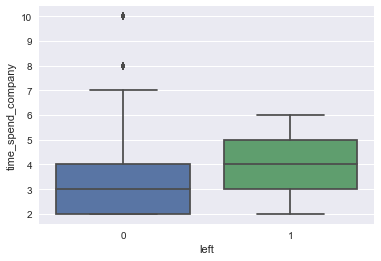

In [93]:
sns.boxplot(x='left', y='time_spend_company', data=hr_stats)
plt.show()

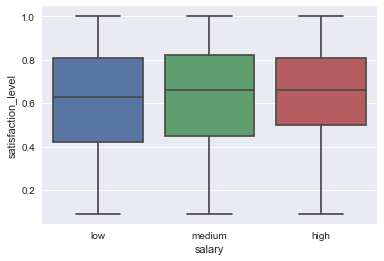

In [113]:
sns.boxplot(x='salary', y='satisfaction_level', data=hr_stats)
plt.show()

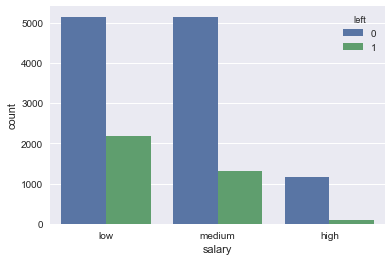

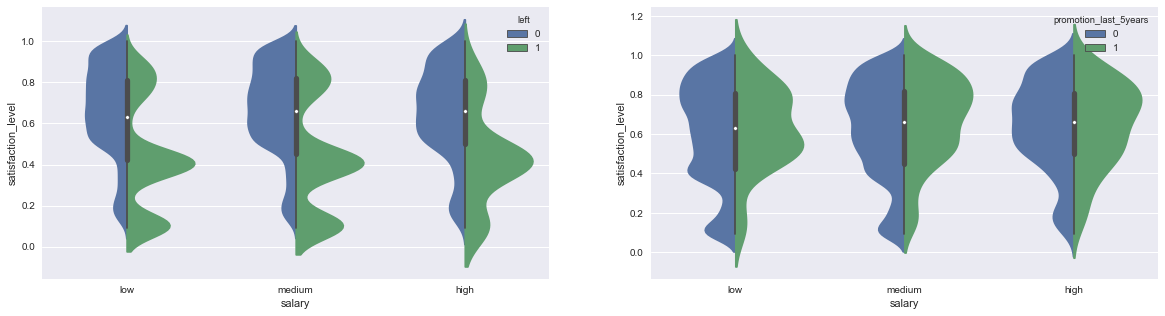

In [79]:
#Examining the relationship between salary, satifaction level, whether or not the employee left, and
#whether or not the employee received a promotion in the last five years
sns.countplot(x='salary',data = hr_stats, hue='left')
plt.show()

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.violinplot(x='salary', y='satisfaction_level', data=hr_stats, hue='left', split=True)
plt.subplot(1, 2, 2)
sns.violinplot(x='salary', y='satisfaction_level', data=hr_stats, hue='promotion_last_5years', split=True)
plt.show()

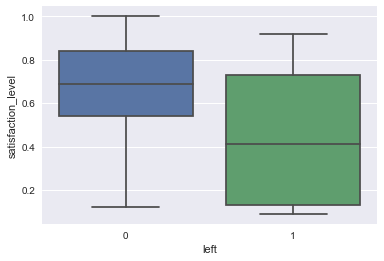

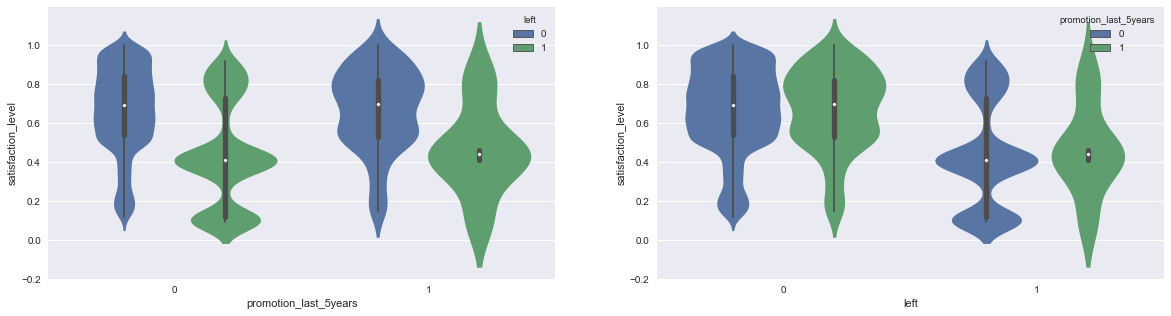

In [77]:
#Examining the relationship between satisfaction level, whether or not the employee left, and 
#whether or not the employee received a promotion in the last five years
sns.boxplot(x='left', y='satisfaction_level', data=hr_stats)
plt.show()

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.violinplot(x='promotion_last_5years', y='satisfaction_level', data=hr_stats, hue='left')
plt.subplot(1, 2, 2)
sns.violinplot(x='left', y='satisfaction_level', data=hr_stats, hue='promotion_last_5years')
plt.show()

In [131]:
###why can I not run this?  I want to know how many people had a low salary, medium salary, and high salary
len(hr_stats['salary']=='low')

14999